# CAPSTONE PROJECT BASED ON PYTHON-TDMB MOVIE DATA ANALYSIS

# BUSINEES OBJECTIVE- 

Production company wants to analyze the movie data. Basically they wants to upgrow the business, so for the same they want some powerful insights with python programming.
 1.for getting to know that which kind of movie is high in demand and which genre is the popular among audience and so on.
2.COMPANY WANTS TO UNDERSTAND THE RELATION BETWEEN POPULARITY AND BUDGET,IF ANY.
3.IDENTIFY THE MOVIES WITH THE HIGHEST BUDGET AND LOWEST BUDGET.
4.FOR KNOWING THE TOP PRODUCTION COMPANIES BY WHICH HIGHEST NUMBER OF MOVIES ARE PRODUCED WHICH ARE IN DEMAND. 



In [34]:
import numpy as np
import pandas as pd
import matplotlib as mat
import seaborn as sns 
import matplotlib.pyplot as plt
from tabulate import tabulate
import scipy.stats as sp
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm

In [17]:
import os
os.getcwd()

'C:\\Users\\Deepika Tyagi\\Downloads'

# TASK-1

# Load the movie dataset in python notebook.Display the number of rows and columns in the dataset.Display the title and generes of the first 50 movies in the dataset.

# LOAD THE DATA

In [13]:
movie_data= pd.read_csv('DS1_C8_V3_ND_Sprint2_Data Analysis Using Python_Dataset.csv')
movie_data


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-05-2007,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",26-10-2015,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-07-2012,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",07-03-2012,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",04-09-1992,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],26-12-2011,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

In [35]:
movie_data.size

96060

# DISPLAY THE NUMBER OF ROWS AND COLUMNS

In [36]:
print(movie_data.shape)

(4803, 20)


In [37]:
print(movie_data.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [38]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              4803 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4803 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4803 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4803 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

There are 4803 rows and 20 columns in the dataset.

# Display the title and generes of the first 50 movies

In [39]:
movie_data[["genres","original_title"]].head(50)

,genres,original_title
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avatar
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Pirates of the Caribbean: At World's End
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Spectre
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",The Dark Knight Rises
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",John Carter
5,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",Spider-Man 3
6,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",Tangled
7,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Avengers: Age of Ultron
8,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",Harry Potter and the Half-Blood Prince
9,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",Batman v Superman: Dawn of Justice


INTERPRETATION:  During Data Pre-processing using Python, firstly we have loaded the dataset in Jupyter notebook via various libraries of Python. There are 4803 rows and 20 columns in our dataset. Later on we have checked the Null value in the dataset, and we have found 5 columns with null value ,so in order to fill the null value ,we are replacing the null values with measure of central tendency as per requirement. 

# TASK-2

# Identify the columns that have null values and perform null values treatment.(Choose the imputation method based on the type of data in the columns of the dataset.)

In [40]:
movie_data.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

# null value treatment

In [41]:
homepage_mode = movie_data.homepage.mode()[0]
print(homepage_mode)
movie_data["homepage"].fillna(homepage_mode, inplace = True)
tagline_mode = movie_data.tagline.mode()[0]
print(tagline_mode)
movie_data["tagline"].fillna(tagline_mode, inplace = True)
overview_mode = movie_data.overview.mode()[0]
print(overview_mode)
movie_data["overview"].fillna(overview_mode, inplace = True)
release_date_mode = movie_data.release_date.mode()[0]
print(release_date_mode)
movie_data["release_date"].fillna(release_date_mode, inplace = True)
runtime_mean = movie_data.runtime.mean()
print(runtime_mean)
movie_data["runtime"].fillna(runtime_mean, inplace = True)

http://www.missionimpossible.com/
Based on a true story.
 
01-01-2006
106.87585919600083


In [42]:
movie_data.isnull().sum()

budget                  0
genres                  0
homepage                0
id                      0
keywords                0
original_language       0
original_title          0
overview                0
popularity              0
production_companies    0
production_countries    0
release_date            0
revenue                 0
runtime                 0
spoken_languages        0
status                  0
tagline                 0
title                   0
vote_average            0
vote_count              0
dtype: int64

In [43]:
movie_data.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  157
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

In [44]:
movie_data.dtypes

budget                    int64
genres                   object
homepage                 object
id                        int64
keywords                 object
original_language        object
original_title           object
overview                 object
popularity              float64
production_companies     object
production_countries     object
release_date             object
revenue                   int64
runtime                 float64
spoken_languages         object
status                   object
tagline                  object
title                    object
vote_average            float64
vote_count                int64
dtype: object

# TASK-3

# Display the movie categories that have budget greater than 220,000. 

In [45]:
a= movie_data

In [46]:
a.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [47]:
x=a[a["budget"]>220000]

In [48]:
x[["genres","budget"]]

,genres,budget
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",237000000
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",300000000
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",245000000
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",250000000
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",260000000
...,...,...
4680,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",450000
4682,"[{""id"": 27, ""name"": ""Horror""}]",13000000
4720,"[{""id"": 18, ""name"": ""Drama""}]",8500000
4758,"[{""id"": 53, ""name"": ""Thriller""}, {""id"": 878, ""...",4000000


INTERPRETATION:   
                We got 3684 MOVIE CATEGORIES that have budget greater than $220,000

# TASK-4

# Display the movie categories where the revenue is greater than 961,000,000.

In [49]:
y=a[a["revenue"]>961000000]

In [50]:
y[["genres","revenue"]]

,genres,revenue
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",2787965087
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",1084939099
7,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1405403694
12,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",1065659812
16,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",1519557910
17,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",1045713802
25,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",1845034188
26,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",1153304495
28,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1513528810
29,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",1108561013


In [51]:
y.size

480

INTERPRETATION:   
THERE ARE 480 MOVIE CATEGORIES that have revenue is greater than $961,000,000.


# TASK-5

# In the dataset,there are some movies for which the budget and revenue columns have the value 0,which mean unknown values.Remove the rows with value 0 from both the budget and revenue columns.

In [52]:
df = a[(a['budget'] != 0) & (a['revenue'] != 0)]



In [53]:
# Displaying the modified DataFrame
print(df)

         budget                                             genres  \
0     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1     300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2     245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
...         ...                                                ...   
4773      27000                     [{"id": 35, "name": "Comedy"}]   
4788      12000  [{"id": 27, "name": "Horror"}, {"id": 35, "nam...   
4792      20000  [{"id": 80, "name": "Crime"}, {"id": 27, "name...   
4796       7000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
4798     220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   

                                          homepage      id  \
0                      http://www.avatarmovie.com/   19995   
1     http://disney.go.com/disneypi

In [54]:
df.size

64580

INTERPRETATION:   
After removing the rows with value 0 from both the budget and revenue columns,there is 64580 records of movie that we are having as output

# TASK-6

# List the top 10 movies with the highest revenues and the top 10 movies with the least budget.

# TOP 10 MOVIES WITH HIGHEST REVENUE

In [55]:
a.sort_values("revenue",ascending=False).head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",18-11-1997,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",25-04-2012,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-06-2015,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",01-04-2015,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avengers_ag...,99861,"[{""id"": 8828, ""name"": ""marvel comic""}, {""id"": ...",en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{""name"": ""Marvel Studios"", ""id"": 420}, {""name...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",22-04-2015,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A New Age Has Come.,Avengers: Age of Ultron,7.3,6767
124,150000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 12, ""...",http://movies.disney.com/frozen,109445,"[{""id"": 2011, ""name"": ""queen""}, {""id"": 4344, ""...",en,Frozen,Young princess Anna of Arendelle dreams about ...,165.125366,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",27-11-2013,1274219009,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Only the act of true love will thaw a frozen h...,Frozen,7.3,5295
31,200000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/ironman3,68721,"[{""id"": 949, ""name"": ""terrorist""}, {""id"": 5597...",en,Iron Man 3,When Tony Stark's world is torn apart by a for...,77.682080,"[

# TOP 10 MOVIES WITH LEAST BUDGET

In [56]:
a.sort_values("budget",ascending=True).head(10)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2401,0,"[{""id"": 53, ""name"": ""Thriller""}]",http://www.missionimpossible.com/,31932,[],en,City of Ghosts,A con man (Dillon) travels to Cambodia (also o...,2.644860,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",01-01-2002,0,116.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,City of Ghosts,5.4,18
3187,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10402, ""...",http://www.missionimpossible.com/,12621,"[{""id"": 2176, ""name"": ""music teacher""}, {""id"":...",en,Hamlet 2,"From the same people that brought you ""Little ...",5.293363,[],"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",21-01-2008,0,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,One high school drama teacher is about to make...,Hamlet 2,6.1,56
3183,0,"[{""id"": 10749, ""name"": ""Romance""}, {""id"": 18, ...",http://www.missionimpossible.com/,14624,"[{""id"": 1158, ""name"": ""grandfather grandson re...",en,The Ultimate Gift,"When his wealthy grandfather finally dies, Jas...",4.976268,"[{""name"": ""The Ultimate Gift LLC"", ""id"": 3914}...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",20-10-2006,0,114.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}, ...",Released,Based on a true story.,The Ultimate Gift,6.8,78
3179,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.missionimpossible.com/,24621,"[{""id"": 187056, ""name"": ""woman director""}]",en,Chasing Papi,Playboy Thomas Fuentes has so far been able to...,1.118511,"[{""name"": ""Fox 2000 Pictures"", ""id"": 711}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-04-2003,6126237,80.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Three women. Three cities. Three times the tro...,Chasing Papi,6.3,16
3178,0,"[{""id"": 18, ""name"": ""Drama""}]",http://www.foxsearchlight.com/thesavages,8272,"[{""id"": 494, ""name"": ""father son relationship""...",en,The Savages,A sister and brother face the realities of fam...,5.663889,"[{""name"": ""Fox Searchlight Pictures"", ""id"": 43...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",19-01-2007,0,114.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Based on a true story.,The Savages,6.8,110
3176,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",http://www.missionimpossible.com/,16428,"[{""id"": 160815, ""name"": ""best selling author""}]",en,Breakin' All the Rules,"Inspired by his fiancée (who dumped him), a ma...",6.904734,"[{""name"": ""Screen Gems"", ""id"": 3287}, {""name"":...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",14-05-2004,0,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When it comes to getting dumped... He wrote th...,Breakin' All the Rules,5.8,21
3157,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.missionimpossible.com/,132316,"[{""id"": 10540, ""name"": ""bollywood""}, {""id"": 15...",hi,Jab Tak Hai Jaan,"An ex-army man, leading a double life in Londo...",5.900535,"[{""name"": ""Yash Raj Films"", ""id"": 1569}]","[{""iso_3166_1"": ""IN"", ""name"": ""India""}]",13-11-2012,0,176.0,"[{""iso_639_1"": ""hi"", ""name"": ""\u0939\u093f\u09...",Released,Based on a true story.,Jab Tak Hai Jaan,7.3,66
3156,0,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 35, ""name...",http://www.reddogmovie.com/,66125,"[{""id"": 1228, ""name"": ""1970s""}, {""id"": 2526, ""...",en,Red Dog,Based on the legendary true story of the Red D...,5.499412,"[{""name"": ""Screen Australia"", ""id"": 7584}, {""n...","[{""iso_3166_1"": ""AU"", ""name"": ""Australia""}]",04-08-2011,0,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,He's Been Everywhere Mate.,Red Dog,7.1,83
3154,0,"[{""id"": 18, ""name""

# TASK-7

# How are popularities of movies related with the movie budget?Are correlated or totally uncorrelated to each other?Write interpretation of your analysis.

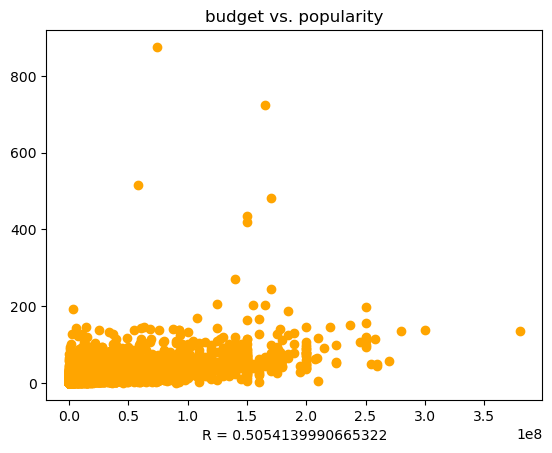

In [57]:
#Calculating Correlation Coefficient
r_corr1=a['budget'].corr(a['popularity'])

plt.scatter(a['budget'],a['popularity'], color='orange')
plt.title('budget vs. popularity')
plt.xlabel("R = "+str(r_corr1))
plt.show()

INTERPRETATION:From the above Scatter plot visual,it is clear that Popularity of movies are totally correlated to Movie Budget.Hence we can say that there is a positive correlation between them.However the Movie Budget is increasing ,the popularity is also increasing in a positive direction.

# TASK-8

# Identify and display the names of all production companies along the number of times they appeared in the dataset.

In [59]:
production_companies_counts = a['production_companies'].value_counts()

# Displaying the names of all production companies along with the number of times they appeared
print("production_companies\tCount")
for company, count in production_companies_counts.items():
    print(f"{company} appears {count} times in the dataset.")

production_companies	Count
[] appears 351 times in the dataset.
[{"name": "Paramount Pictures", "id": 4}] appears 58 times in the dataset.
[{"name": "Universal Pictures", "id": 33}] appears 45 times in the dataset.
[{"name": "New Line Cinema", "id": 12}] appears 38 times in the dataset.
[{"name": "Columbia Pictures", "id": 5}] appears 37 times in the dataset.
[{"name": "Metro-Goldwyn-Mayer (MGM)", "id": 8411}] appears 32 times in the dataset.
[{"name": "Twentieth Century Fox Film Corporation", "id": 306}] appears 31 times in the dataset.
[{"name": "Warner Bros.", "id": 6194}] appears 27 times in the dataset.
[{"name": "Walt Disney Pictures", "id": 2}] appears 27 times in the dataset.
[{"name": "Touchstone Pictures", "id": 9195}] appears 26 times in the dataset.
[{"name": "Dimension Films", "id": 7405}] appears 17 times in the dataset.
[{"name": "Columbia Pictures Corporation", "id": 441}] appears 16 times in the dataset.
[{"name": "Miramax Films", "id": 14}] appears 16 times in the dat

INTERPRETATION: Here we are having 351 records with production companies along the number of times they appeared in the dataset.


# TASK-9

# Display the name of top 25 production companies based on the number of movies they have produced in descending order of the number of movies produced.

In [60]:
production_companies_counts =a['production_companies'].value_counts()

In [61]:
top_25_companies = production_companies_counts.head(25)

In [62]:
print("Top 25 Production Companies\tCount")
for company, count in top_25_companies.items():
    print(f"The number of movies produced by {company} is {count}")

Top 25 Production Companies	Count
The number of movies produced by [] is 351
The number of movies produced by [{"name": "Paramount Pictures", "id": 4}] is 58
The number of movies produced by [{"name": "Universal Pictures", "id": 33}] is 45
The number of movies produced by [{"name": "New Line Cinema", "id": 12}] is 38
The number of movies produced by [{"name": "Columbia Pictures", "id": 5}] is 37
The number of movies produced by [{"name": "Metro-Goldwyn-Mayer (MGM)", "id": 8411}] is 32
The number of movies produced by [{"name": "Twentieth Century Fox Film Corporation", "id": 306}] is 31
The number of movies produced by [{"name": "Warner Bros.", "id": 6194}] is 27
The number of movies produced by [{"name": "Walt Disney Pictures", "id": 2}] is 27
The number of movies produced by [{"name": "Touchstone Pictures", "id": 9195}] is 26
The number of movies produced by [{"name": "Dimension Films", "id": 7405}] is 17
The number of movies produced by [{"name": "Columbia Pictures Corporation", "id"

INTERPRETATION: Here is the records top 25 production companies based on the number of movies they have produced in descending order of the number of movies produced

# TASK-10

# Sort the data in descending order based on revenue and filter 500 movies.Find the measures of central Tendency for the three columns given below here         i)MEAN      ii) MEDIAN         iii)MODE
PERFORM THE OUTLIER ANALYSIS FOR ABOVE THREE COLUMNS USING BOX PLOTS.

In [63]:
b=a.sort_values("revenue",ascending=False).head(500)

In [64]:
b

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",18-11-1997,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",25-04-2012,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-06-2015,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",01-04-2015,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,48000000,"[{""id"": 35, ""name"": ""Comedy""}]",http://www.missionimpossible.com/,4256,"[{""id"": 12416, ""name"": ""horror spoof""}]",en,Scary Movie 3,In the third installment of the Scary Movie fr...,36.585509,"[{""name"": ""Dimension Films"", ""id"": 7405}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",24-10-2003,220673217,84.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Great trilogies come in threes.,Scary Movie 3,5.8,912
41,200000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 28, ""...",http://greenlanternmovie.warnerbros.com/,44912,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 4375...",en,Green Lantern,"For centuries, a small but powerful force of w...",51.872839,"[{""name"": ""De Line Pictures"", ""id"": 2609}, {""n...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",16-06-2011,219851172,114.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"In our darkest hour, there will be light.",Green Lantern,5.1,2487
521,60000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.theterminal-themovie.com/,594,"[{""id"": 242, ""name"": ""new york""}, {""id"": 822, ...",en,The Terminal,Viktor Navorski

# Mean of           i)BUDGET             ii)REVENUE                          iii) RUNTIME

In [66]:
budget_mean = b['budget'].mean()

# Displaying the mean of the 'budget' column
print(f"Mean Budget: {budget_mean}")

revenue_mean = b['revenue'].mean()

# Displaying the mean of the 'revenue' column
print(f"Mean Revenue: {revenue_mean}")


runtime_mean = b['runtime'].mean()

# Displaying the mean of the 'runtime' column
print(f"Mean Runtime: {runtime_mean}")

Mean Budget: 102803736.0
Mean Revenue: 458722133.294
Mean Runtime: 118.626


# Median  of           i)BUDGET             ii)REVENUE                          iii) RUNTIME


In [67]:
budget_median = b['budget'].median()

# Displaying the median of the 'budget' column
print(f"Median Budget: {budget_median}")

revenue_median = b['revenue'].median()

# Displaying the median of the 'revenue' column
print(f"Median Revenue: {revenue_median}")

runtime_median = b['runtime'].median()

# Displaying the median of the 'runtime' column
print(f"Median Runtime: {runtime_median}")

Median Budget: 95000000.0
Median Revenue: 363001569.5
Median Runtime: 116.0


# Mode  of           i)BUDGET             ii)REVENUE                          iii) RUNTIME

In [68]:
budget_mode = b['budget'].mode()

# Displaying the mode of the 'budget' column
print(f"Mode Budget: {budget_mode.item()}")

revenue_mode = b['revenue'].mode()

# Displaying the mode of the 'revenue' column
print(f"Mode Revenue: {revenue_mode}")

runtime_mode = b['runtime'].mode()

# Displaying the mode of the 'runtime' column
print(f"Mode Runtime: {runtime_mode.item()}")

Mode Budget: 150000000
Mode Revenue: 0       219076518
1       219103655
2       219417255
3       219851172
4       220673217
          ...    
495    1506249360
496    1513528810
497    1519557910
498    1845034188
499    2787965087
Name: revenue, Length: 500, dtype: int64
Mode Runtime: 115.0


# OUTLIER ANALYSIS USING BOX PLOT

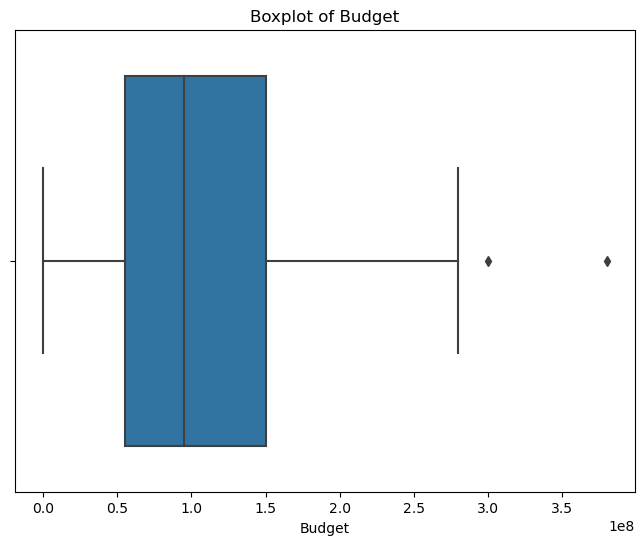

In [69]:
# Creating a boxplot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x= b['budget'])
plt.title('Boxplot of Budget')
plt.xlabel('Budget')
plt.show()

INTERPRETATION:The above Box plot is showing right Skewness.There are only 2 outliers visible by Box plot method in 'Budget' column.

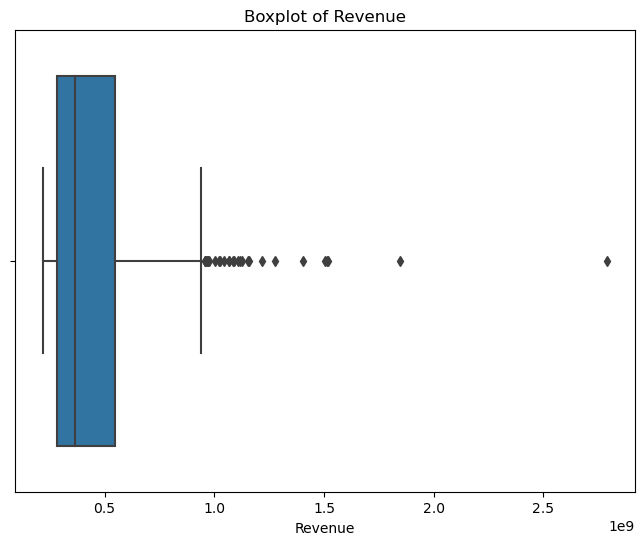

In [70]:
# Creating a boxplot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x= b['revenue'])
plt.title('Boxplot of Revenue')
plt.xlabel('Revenue')
plt.show()

INTERPRETATION:The above Box plot is showing right Skewness.There are so many outliers visible by Box plot method in 'Revenue' column.

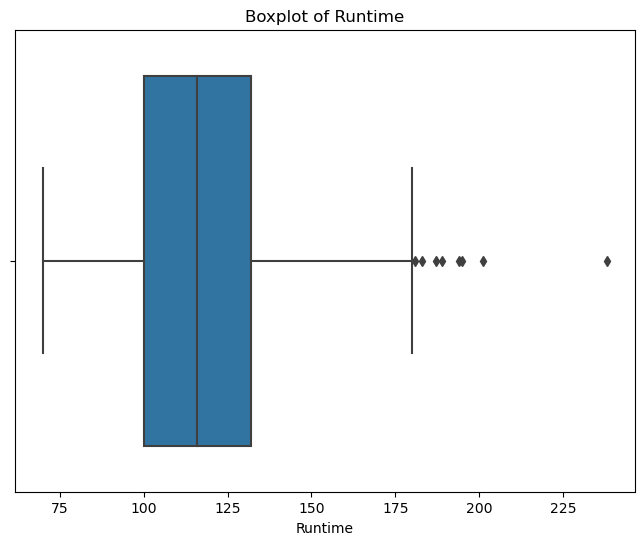

In [71]:
# Creating a boxplot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x= b['runtime'])
plt.title('Boxplot of Runtime')
plt.xlabel('Runtime')
plt.show()

INTERPRETATION:The above Box plot is showing right Skewness.There are also few outliers  visible by Box plot method in 'Runtime' column.

# TASK-11

# Identify and display the name of movies alongwith their runtimes for those movies that have above average runtime,using the data from previous task.

In [72]:
average_runtime = b['runtime'].mean()

In [73]:
# Filtering movies with runtimes above the average
Above_average_movies = b[b['runtime'] > average_runtime]


In [74]:
Above_average_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",10-12-2009,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
25,200000000,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""n...",http://www.titanicmovie.com,597,"[{""id"": 2580, ""name"": ""shipwreck""}, {""id"": 298...",en,Titanic,"84 years later, a 101-year-old woman named Ros...",100.025899,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",18-11-1997,1845034188,194.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Nothing on Earth could come between them.,Titanic,7.5,7562
16,220000000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",http://marvel.com/avengers_movie/,24428,"[{""id"": 242, ""name"": ""new york""}, {""id"": 5539,...",en,The Avengers,When an unexpected enemy emerges and threatens...,144.448633,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",25-04-2012,1519557910,143.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some assembly required.,The Avengers,7.4,11776
28,150000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.jurassicworld.com/,135397,"[{""id"": 1299, ""name"": ""monster""}, {""id"": 1718,...",en,Jurassic World,Twenty-two years after the events of Jurassic ...,418.708552,"[{""name"": ""Universal Studios"", ""id"": 13}, {""na...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",09-06-2015,1513528810,124.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The park is open.,Jurassic World,6.5,8662
44,190000000,"[{""id"": 28, ""name"": ""Action""}]",http://www.furious7.com/,168259,"[{""id"": 830, ""name"": ""car race""}, {""id"": 3428,...",en,Furious 7,Deckard Shaw seeks revenge against Dominic Tor...,102.322217,"[{""name"": ""Universal Pictures"", ""id"": 33}, {""n...","[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}, {""iso_...",01-04-2015,1506249360,137.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Vengeance Hits Home,Furious 7,7.3,4176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1161,40000000,"[{""id"": 18, ""name"": ""Drama""}]",http://www.thesocialnetwork-movie.com/,37799,"[{""id"": 2157, ""name"": ""hacker""}, {""id"": 12361,...",en,The Social Network,"On a fall night in 2003, Harvard undergrad and...",69.278220,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",30-09-2010,224920315,120.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,You don't get to 500 million friends without m...,The Social Network,7.1,3391
912,60000000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 10749, ""...",http://www.missionimpossible.com/,628,"[{""id"": 90, ""name"": ""paris""}, {""id"": 582, ""nam...",en,Interview with the Vampire,"A vampire relates his epic life story of love,...",50.163785,"[{""name"": ""Geffen Pictures"", ""id"": 360}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",11-11-1994,223664608,123.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Drink from me and live forever,Interview with the Vampire,7.2,1516
521,60000000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.theterminal-themovie.com/,594,"[{""id"": 242, ""name"": ""new york"

In [76]:
# Displaying the name of movies along with their runtimes
print("Movies with Above Average Runtime:")
for index, row in Above_average_movies.iterrows():
    print(f"{row['original_title']} runtime: {row['runtime']} minutes")

Movies with Above Average Runtime:
Avatar runtime: 162.0 minutes
Titanic runtime: 194.0 minutes
The Avengers runtime: 143.0 minutes
Jurassic World runtime: 124.0 minutes
Furious 7 runtime: 137.0 minutes
Avengers: Age of Ultron runtime: 141.0 minutes
Iron Man 3 runtime: 130.0 minutes
Captain America: Civil War runtime: 147.0 minutes
Transformers: Dark of the Moon runtime: 154.0 minutes
The Lord of the Rings: The Return of the King runtime: 201.0 minutes
Skyfall runtime: 143.0 minutes
Transformers: Age of Extinction runtime: 165.0 minutes
The Dark Knight Rises runtime: 165.0 minutes
Pirates of the Caribbean: Dead Man's Chest runtime: 151.0 minutes
Pirates of the Caribbean: On Stranger Tides runtime: 136.0 minutes
The Hobbit: An Unexpected Journey runtime: 169.0 minutes
The Dark Knight runtime: 152.0 minutes
Harry Potter and the Philosopher's Stone runtime: 152.0 minutes
Pirates of the Caribbean: At World's End runtime: 169.0 minutes
The Hobbit: The Desolation of Smaug runtime: 161.0 minu

INTERPRETATION:  there is 232 name of movies alongwith their runtimes for those movies that have above average runtime,using the data from previous task.


# FINAL INTERPRETATION:

As we have solved all given tasks successfully, SO ON THE BASIS OF WHICH THE FOLLOWING OBSERVATIONS AND RECOMMENDATION MUST BE FOLLOWED FOR GETTING THE MAXIMUM PROFIT:
1.THE MOST POPULAR GENRES WHICH ARE HIGHLY IN DEMAND BY AUDIECE ARE ‘ACTION’, ‘ADVENTURE’,’SCIENCE-FICTION’ AND ‘DRAMA’.
2.“AVATAR” IS THE MOVIE WITH HIGHEST REVENUE,WHILE “MODERN TIMES” IS THE MOVIE WITH LOWEST BUDGET.
3.THERE IS POSITIVE CORRELATION BETWEEN POPULARITY AND BUDGET OF THE MOVIES AND THE SAME RELATION IS BETWEEN BUDGET AND REVENUE.
4.“PARAMOUNT PICTURES” IS THE PRODUCTION COMPANY WITH THE HIGHEST NUMBER OF MOVIES THAT IS 48.

